In [34]:
# https://www.kaggle.com/harlfoxem/housesalesprediction/kernels
# Check top 2 kernals based on votes... 
# Record here formulars  for MSE , RMSE , P-value 
#https://www.kaggle.com/nicapotato/in-depth-simple-linear-regression


%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Only Linear Regression is explained in Detail in this Notebook
- no Stratified test train split 
- Analysing the model output is important

### Loading Data and First Look

In [2]:
Curr_Dir = os.path.dirname(os.getcwd())
data_path = os.path.join(Curr_Dir , 'Datasets\kc_housing\kc_house_data.csv')
Data = pd.read_csv(data_path)
print(Data.shape)

(21613, 21)


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Splitting Features (X) and Target(y)
- date column is not used here hence removing it from Features

In [5]:
y = Data['price']
X = Data.drop(columns=['price', 'date'])

print(X.head())
print(y.head())

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3       1.00         1180      5650     1.0           0   
1  6414100192         3       2.25         2570      7242     2.0           0   
2  5631500400         2       1.00          770     10000     1.0           0   
3  2487200875         4       3.00         1960      5000     1.0           0   
4  1954400510         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sq

### Splitting Data into Test and Train 

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


### Fitting the Data to LinearRegression

In [18]:
linear = LinearRegression(fit_intercept=True , normalize=True)
linear.fit(X=X_train, y=y_train)
print(linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


### Predicting the X_test

In [15]:
predicted_values = linear.predict(X_test)
print(linear.intercept_)
print(linear.coef_)


4308069.803718246
[-9.51431412e-07 -3.89848806e+04  3.96710606e+04  9.49108855e+01
  1.39956659e-01  4.25239816e+03  5.81963381e+05  5.03149995e+04
  2.60005541e+04  9.31047326e+04  1.00393866e+02  6.36882552e+01
 -2.59079335e+03  2.31522099e+01 -5.78973925e+02  6.03775291e+05
 -2.30827228e+05  1.57501723e+01 -4.50536810e-01]


# Analysing the Model's Accuracy
### Using inbuilt score method , calculates the "coefficient of determination - R^2 or R-Squared"

In [24]:
linear.score(X_test, y_test)

0.7122059538253875

### Visualizing the predicted data vs predicted values

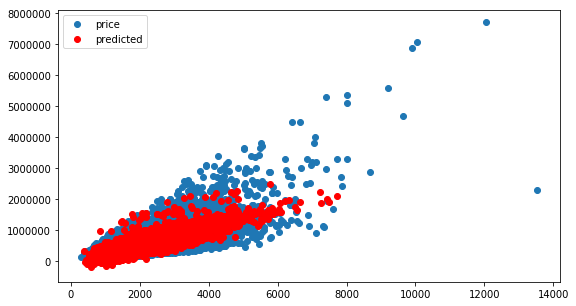

In [32]:
plt.figure(figsize=(9,5))
plt.scatter(x=X_train.sqft_living, y=y_train)
plt.scatter(X_test.sqft_living, predicted_values, color='red', label='predicted')
plt.legend()

### Actual vs Predicted - to check it looks similar to straight line

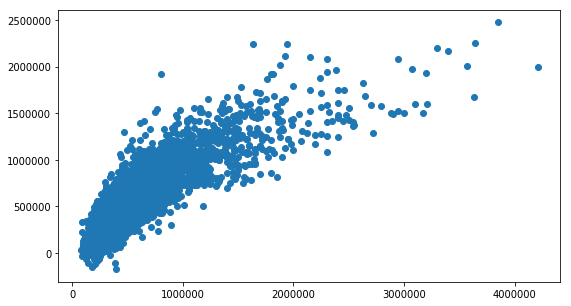

In [33]:
plt.figure(figsize=(9,5))
plt.scatter(x=y_test, y=predicted_values)